![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**
   ## Solution by **Paul Martín García Morfín**
   ### A01750164 | ITESM

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.7.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.7 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=e3559e609c706b7cf085f0bc53304452dd3160b0f6464c149c81fc100186a58a
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user a01750164@tec.mx password ingenioIRS31_

Writing .authinfo


Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 344



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto/sascfg_personal.py
WORK Path             = /saswork/SAS_work8CB80001B88A_odaws01-usw2-2.oda.sas.com/SAS_workBABB0001B88A_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 112778


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 11:24:00 AM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 11:24:00 AM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

UsageError: Cell magic `%%SAS` not found.


## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [ ]:
data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

## Merge the Data

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"], how="right")
data_merge.sample(5)

#data_merge.head()

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
946969,2946970.0,KENNEY,WALTER,0.0,40.0,70600.0,University / College,Suburban,7.0,1.0,...,6.0,2.0,7.0,375.0,75.0,300.0,0.0,0.0,0.0,0.0
992243,2992244.0,GEORGE,GAIL,1.0,26.0,18400.0,High School,Suburban,9.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
746194,2746195.0,SYE,TEDDY,0.0,40.0,142400.0,University / College,Suburban,10.0,0.0,...,10.0,1.0,10.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
286679,2286680.0,LOPEZ,ENID,1.0,22.0,10200.0,University / College,Suburban,2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
501720,2501721.0,WARD,CYNTHIA,1.0,35.0,110800.0,High School,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## EDA

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   ID            1000000 non-null  float64
 1   LastName      999977 non-null   object 
 2   FirstName     999996 non-null   object 
 3   Woman         1000000 non-null  float64
 4   Age           1000000 non-null  float64
 5   Salary        1000000 non-null  float64
 6   Education     1000000 non-null  object 
 7   City          1000000 non-null  object 
 8   SeniorList    1000000 non-null  float64
 9   NbActivities  1000000 non-null  float64
 10  Referrals     1000000 non-null  float64
 11  Recency       336334 non-null   float64
 12  Frequency     336334 non-null   float64
 13  Seniority     336334 non-null   float64
 14  TotalGift     336334 non-null   float64
 15  MinGift       336334 non-null   float64
 16  MaxGift       336334 non-null   float64
 17  GaveLastYear  1000000 non-nu

In [ ]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


In [ ]:
data_merge.isnull().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift         663666
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

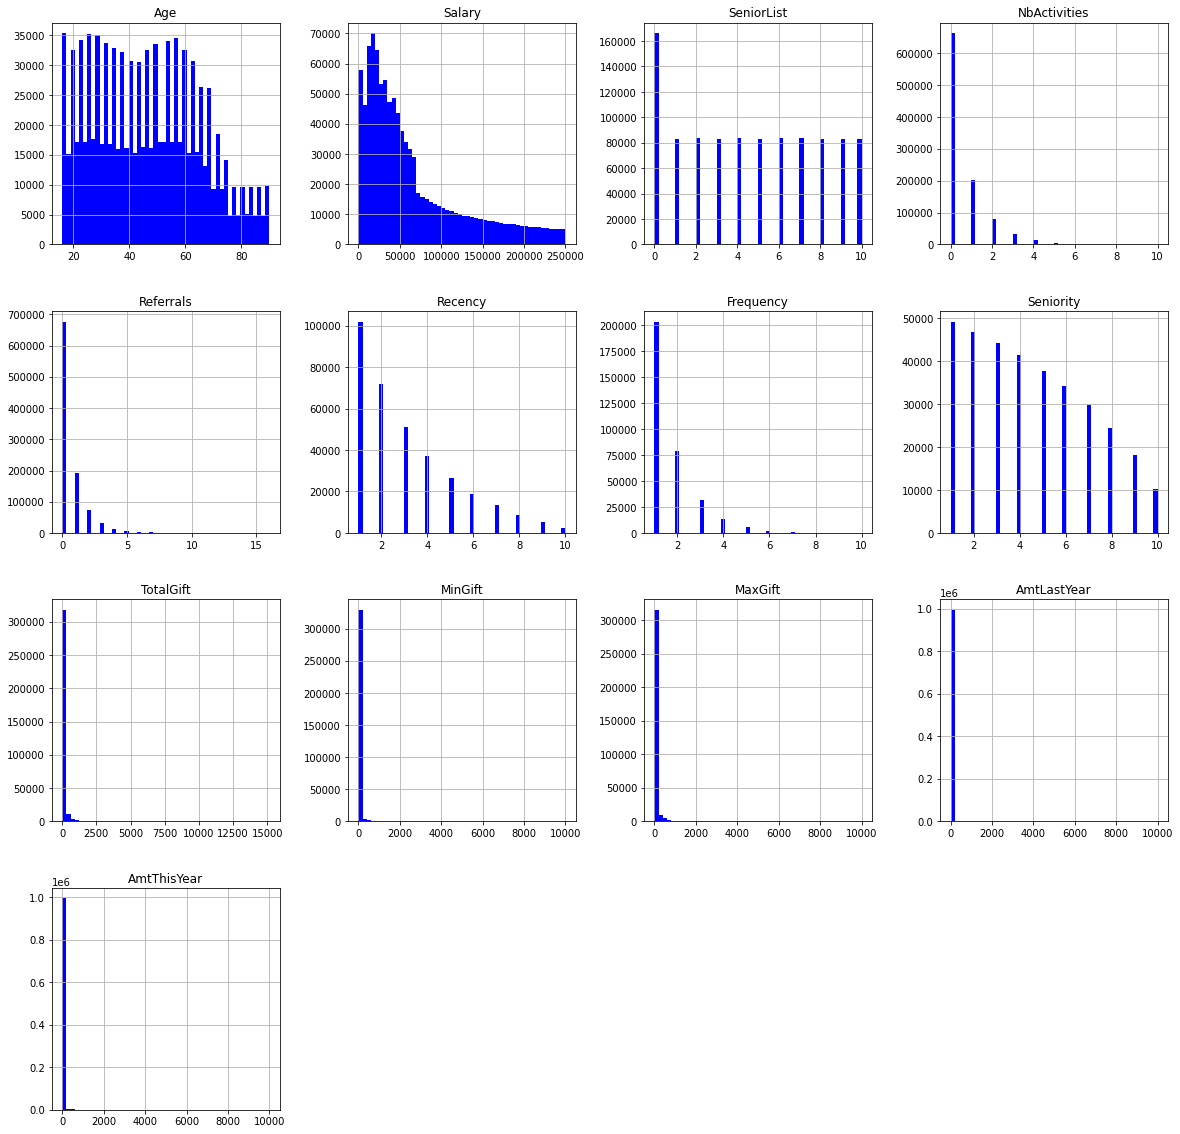

In [ ]:
data_merge[["Age", "Salary", "SeniorList", "NbActivities", "Referrals", "Recency", "Frequency", "Seniority", "TotalGift", "MinGift", "MaxGift", "AmtLastYear", "AmtThisYear"]].hist(bins=50, figsize=(20, 20), facecolor="b")
plt.show()

In [ ]:
#data_merge.loc[data_merge["Recency"].notnull()].sample(20).drop(["ID"], axis=1)

In [ ]:
data_merge.loc[data_merge["TotalGift"] <= 10].drop(["ID"], axis=1)

,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
49,NARANJO,MARCIA,1.0,62.0,54500.0,University / College,Rural,2.0,0.0,0.0,2.0,1.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
89,HUGHES,LARRY,0.0,53.0,182700.0,University / College,City,1.0,1.0,2.0,1.0,1.0,1.0,10.0,10.0,10.0,0.0,0.0,1.0,50.0
115,RANNE,SABINA,1.0,17.0,3800.0,High School,City,10.0,1.0,0.0,9.0,1.0,9.0,10.0,10.0,10.0,0.0,0.0,1.0,20.0
139,COLLIGNON,GONZALO,0.0,51.0,85700.0,University / College,Suburban,5.0,0.0,0.0,5.0,1.0,5.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
146,AMAYA,DORA,1.0,59.0,173600.0,University / College,City,8.0,1.0,1.0,6.0,1.0,6.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999920,VOGT,MICHELLE,1.0,23.0,8800.0,High School,City,1.0,1.0,0.0,1.0,1.0,1.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
999922,BROWN,JAMES,0.0,23.0,28500.0,High School,Suburban,8.0,0.0,0.0,1.0,1.0,1.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
999941,WITTIG,MARGARITA,1.0,17.0,2200.0,High School,City,10.0,0.0,0.0,8.0,1.0,8.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0
999964,SUTER,JO,1.0,85.0,35000.0,University / College,Suburban,5.0,2.0,0.0,3.0,1.0,3.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0


In [ ]:
data_merge["Education"].value_counts()

University / College    647904
High School             322516
Elementary               29580
Name: Education, dtype: int64

In [ ]:
data_merge["City"].value_counts()

City        332657
Suburban    312671
Rural       197978
Downtown    156694
Name: City, dtype: int64

In [ ]:
data_merge[["LastName", "TotalGift", "AmtLastYear", "AmtThisYear"]].groupby(by="LastName").mean().sort_values("TotalGift", ascending=False).head(20)

,TotalGift,AmtLastYear,AmtThisYear
LastName,,,
PROSE,10125.0,16.666667,21.666667
WENINGER,10120.0,0.000000,30.000000
KARRER,10080.0,0.000000,0.000000
UMLAND,10070.0,8.333333,0.000000
PITTI,10030.0,0.000000,0.000000
KIRCHMEYER,10000.0,0.000000,0.000000
GOMER,9195.0,10.000000,14.285714
GEHAN,9185.0,25.000000,20.000000
KUNGU,9020.0,0.000000,0.000000


In [ ]:
data_merge[["Woman", "TotalGift", "AmtLastYear", "AmtThisYear"]].groupby(by="Woman").sum()

,TotalGift,AmtLastYear,AmtThisYear
Woman,,,
0.0,14362275.0,3145355.0,3138170.0
1.0,20769175.0,4527660.0,4602910.0


In [ ]:
data_merge[["City", "TotalGift", "AmtLastYear", "AmtThisYear"]].groupby(by="City").sum()

,TotalGift,AmtLastYear,AmtThisYear
City,,,
City,12937755.0,2753660.0,2842050.0
Downtown,6804690.0,1519920.0,1498765.0
Rural,4550450.0,1012460.0,986660.0
Suburban,10838555.0,2386975.0,2413605.0


In [ ]:
data_merge[["Education", "TotalGift", "AmtLastYear", "AmtThisYear"]].groupby(by="Education").sum()

,TotalGift,AmtLastYear,AmtThisYear
Education,,,
Elementary,935015.0,195860.0,204320.0
High School,10200220.0,2208305.0,2249830.0
University / College,23996215.0,5268850.0,5286930.0


## Data preparation

In [ ]:
data_new = data_merge.copy()

In [ ]:
data_new.drop(["ID", "FirstName"], axis=1, inplace=True)

In [ ]:
data_new["City"].replace(["Rural", "Downtown", "Suburban", "City"], [0, 1, 2, 3], inplace=True)

In [ ]:
data_new["Education"].replace(["Elementary", "High School", "University / College"], [0, 1, 2], inplace=True)

In [ ]:
'''data_new = pd.get_dummies(data_merge, columns=["Woman"], drop_first=False)
data_new = pd.get_dummies(data_new, columns=["City"], drop_first=False)
data_new = pd.get_dummies(data_new, columns=["Education"], drop_first=False)'''

In [ ]:
'''data_new.rename({"Woman_0.0": "Man"}, axis=1, inplace=True)
data_new.rename({"Woman_1.0": "Woman"}, axis=1, inplace=True)'''

In [ ]:
data_new.sample(5)

,LastName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
662370,CRUMP,0.0,17.0,40500.0,1,3,5.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
825759,SPINDLER,1.0,39.0,15500.0,1,1,6.0,1.0,2.0,3.0,2.0,5.0,420.0,20.0,400.0,0.0,0.0,0.0,0.0
566097,YOUNG,1.0,84.0,25600.0,1,0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
236831,BONE,0.0,20.0,44000.0,2,3,9.0,1.0,1.0,6.0,2.0,8.0,100.0,50.0,50.0,0.0,0.0,0.0,0.0
417186,RAMIREZ,1.0,51.0,118800.0,2,2,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [ ]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
546613,2546614.0,WHITE,SANDRA,1.0,33.0,29000.0,High School,Rural,6.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
595453,2595454.0,HENDERSON,JOSHUA,0.0,52.0,70000.0,University / College,City,6.0,0.0,...,4.0,2.0,6.0,30.0,10.0,20.0,0.0,0.0,0.0,0.0
606906,2606907.0,PATILLO,CHARLES,0.0,53.0,202600.0,High School,Suburban,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,1.0,90.0,0.0,0.0


In [ ]:
data_new[["MinGift"]] = data_new[["MinGift"]].fillna(value=0) 
data_new[["MaxGift"]] = data_new[["MaxGift"]].fillna(value=0) 
data_new[["TotalGift"]] = data_new[["TotalGift"]].fillna(value=0) 
data_new[["Frequency"]] = data_new[["Frequency"]].fillna(value=0) 
data_new[["Recency"]] = data_new[["Recency"]].fillna(value=11) 
data_new[["Seniority"]] = data_new[["Seniority"]].fillna(value=11) 

In [ ]:
data_new

,LastName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
0,ROMMES,0.0,25.0,107200.0,2,3,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0,0.0,0.0
1,RAMIREZ,1.0,38.0,15800.0,1,0,4.0,1.0,1.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TSOSIE,1.0,37.0,57400.0,2,0,5.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LEE,1.0,78.0,23700.0,1,0,3.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HUMPHRES,1.0,34.0,71900.0,2,0,8.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,SCHUBERT,1.0,29.0,15100.0,1,2,8.0,3.0,2.0,5.0,1.0,5.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
999996,LUGGE,1.0,22.0,7000.0,1,2,10.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999997,ROY,0.0,17.0,1000.0,1,3,10.0,1.0,1.0,1.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0
999998,LIBERTI,1.0,32.0,43900.0,2,0,0.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data_new.isnull().sum()

LastName        23
Woman            0
Age              0
Salary           0
Education        0
City             0
SeniorList       0
NbActivities     0
Referrals        0
Recency          0
Frequency        0
Seniority        0
TotalGift        0
MinGift          0
MaxGift          0
GaveLastYear     0
AmtLastYear      0
GaveThisYear     0
AmtThisYear      0
dtype: int64

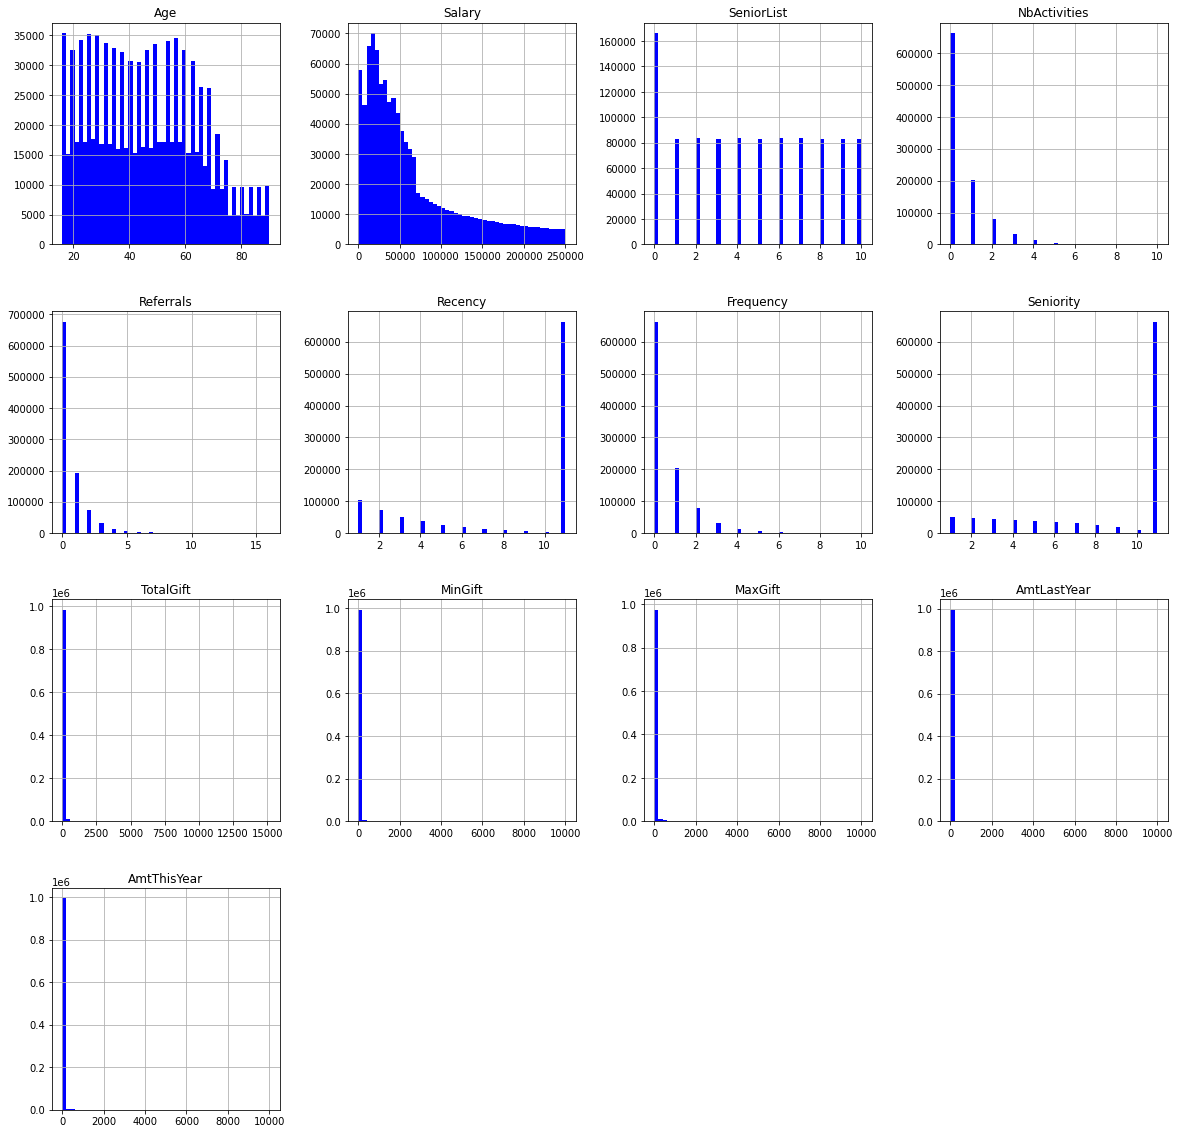

In [ ]:
data_new[["Age", "Salary", "SeniorList", "NbActivities", "Referrals", "Recency", "Frequency", "Seniority", "TotalGift", "MinGift", "MaxGift", "AmtLastYear", "AmtThisYear"]].hist(bins=50, figsize=(20, 20), facecolor="b")
plt.show()

## Feature engineering

In [ ]:
data_new.assign(HasDonated=0)
data_new.loc[data_new["Recency"] > 10, "HasDonated"] = 0
data_new.loc[data_new["Recency"] <= 10, "HasDonated"] = 1

In [ ]:
'''data_new.assign(ValLastName=0)
data_new.loc[data_new["Recency"] > 10, "HasDonated"] = 0
data_new.loc[data_new["Recency"] <= 10, "HasDonated"] = 1'''

In [ ]:
'''data_new['CategoryTotal']'''

In [ ]:
'''from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_new['AgeCode'] = label.fit_transform(all_data['CategoryAge'])'''

In [ ]:
data_new.sample(10)

,LastName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear,HasDonated
864958,FERGUSON,1.0,55.0,32800.0,2,3,4.0,1.0,0.0,1.0,1.0,1.0,20.0,20.0,20.0,1.0,25.0,0.0,0.0,1.0
367263,HOUK,0.0,29.0,35700.0,2,3,5.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347258,REPPERT,1.0,30.0,69600.0,2,1,7.0,0.0,1.0,7.0,1.0,7.0,20.0,20.0,20.0,1.0,50.0,0.0,0.0,1.0
705522,IZZO,0.0,23.0,29700.0,2,2,0.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0
205799,STRUTHERS,1.0,56.0,54200.0,1,1,0.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92522,DYE,0.0,34.0,67600.0,1,2,8.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0
873178,BEIRNE,0.0,54.0,195300.0,2,2,5.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,1.0,50.0,1.0,30.0,0.0
122543,FOWLER,1.0,42.0,162000.0,2,0,3.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
697278,SZEKERES,0.0,64.0,65500.0,2,2,9.0,0.0,1.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12907,BOOTH,0.0,21.0,46300.0,2,1,0.0,0.0,0.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Correlation

Text(0.5, 1.0, 'Correlation matrix')

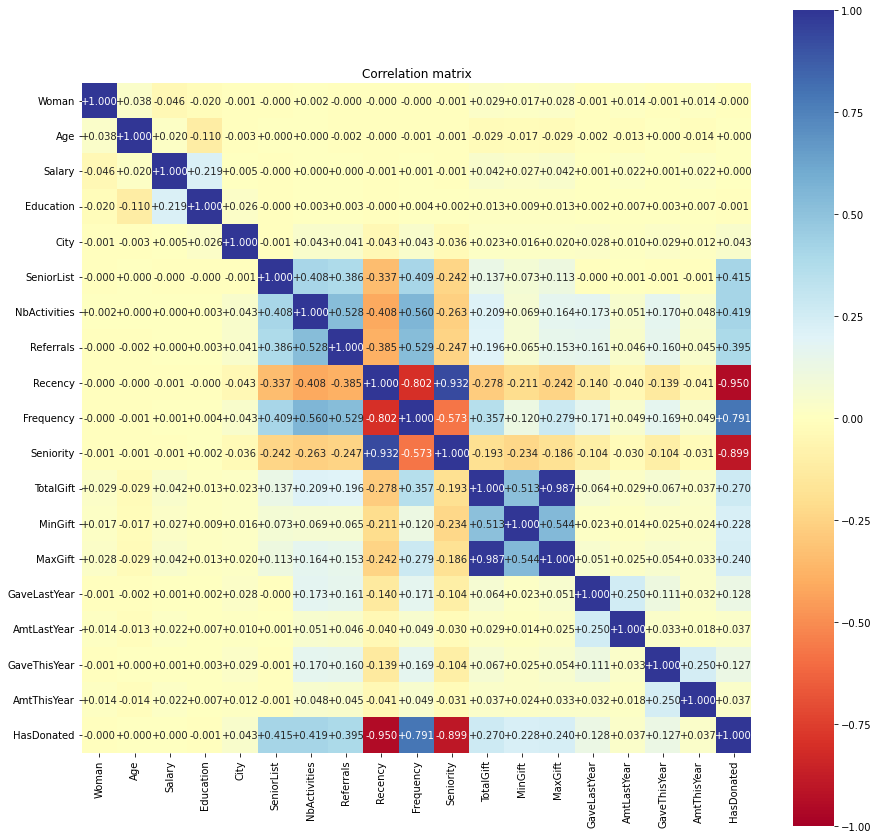

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(data_new.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix")

## Feature selection

In [ ]:
#X = data_new[["Woman", "Age", "Salary", "Recency", "NbActivities", "TotalGift", "GaveLastYear"]]
X = data_new[['Woman', 'Age', 'Salary', 'Education', 'City', 'NbActivities', 'MinGift', 'AmtLastYear']]
Y = data_new["AmtThisYear"]

## Standardization and scaling

In [ ]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

'''scaler = StandardScaler().fit(X)
X = scaler.transform(X)'''
rscaler = RobustScaler().fit(X)
X = rscaler.transform(X)
minmax = MinMaxScaler().fit(X)
X = minmax.transform(X)

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
495,2000496.0,MEDINA,GEORGE,0.0,35.0,214800.0,University / College,Suburban,3.0,3.0,...,1.0,3.0,3.0,75.0,20.0,30.0,0.0,0.0,1.0,50.0
615478,2615479.0,LAPERUTA,MARIA,1.0,63.0,72200.0,High School,Rural,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=0)

## Prebuilt Models
***
> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.

### **Linear Regression Model**

In [ ]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.288003475714971
7607.206593588198
87.21930172609844


### **Regression Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data

In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.280353710919018
6211.201179784136
78.8111742063531


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## My Models
***

### **Linear Regression**

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
regr_predict = regr.predict(X_valid)

In [ ]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid, regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, regr_predict)))

13.281911706714304
6212.452835120253
78.81911465577531


### **Regresion Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train, Y_train)
DT_predict = DT_model.predict(X_valid) #Predictions on Testing data

In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid, DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, DT_predict)))

13.280353710919018
6211.201179784136
78.8111742063531


### **XGBoost**

In [ ]:
import xgboost as xg

xgb_model = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123).fit(X_train, Y_train)
xgb_predict = xgb_model.predict(X_valid)

In [ ]:
#you can change the criteria
#MAE
print(metrics.mean_absolute_error(Y_valid, xgb_predict))
#MSE
print(metrics.mean_squared_error(Y_valid, xgb_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid, xgb_predict)))

11.448615498925447
6218.948239072493
78.86030838813969


## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [ ]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

In [ ]:
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=0) 
scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 
scoring_data[['Recency']] = scoring_data[['Recency']].fillna(value=11) 

In [ ]:
scoring_data["City"].replace(["Rural", "Downtown", "Suburban", "City"], [0, 1, 2, 3], inplace=True)
scoring_data["Education"].replace(["Elementary", "High School", "University / College"], [0, 1, 2], inplace=True)

In [ ]:
X = scoring_data[['Woman', 'Age', 'Salary', 'Education', 'City', 'NbActivities', 'MinGift', 'AmtLastYear']]

In [ ]:
rscaler = RobustScaler().fit(X)
X = rscaler.transform(X)
minmax = MinMaxScaler().fit(X)
X = minmax.transform(X)

In [ ]:
DT_predict_end = DT_model.predict(X)

scoring_data['Prediction'] = DT_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True, ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
420890,2420891.0,1.0,9000.0,BEIL,MARGARET,1.0,37.0,104200.0,0,1,10.0,5.0,5.0,7.0,1.0,7.0,7000.0,7000.0,7000.0,9000.000000
286775,2286776.0,0.0,0.0,WHITFIELD,MARY,1.0,23.0,249000.0,2,2,6.0,5.0,3.0,0.0,1.0,0.0,7000.0,7000.0,7000.0,9000.000000
650641,2650642.0,0.0,0.0,ELROY,HECTOR,0.0,27.0,4900.0,2,3,5.0,1.0,0.0,3.0,1.0,3.0,6000.0,6000.0,6000.0,833.333333
362806,2362807.0,0.0,0.0,LEAR,ROSALINDA,1.0,23.0,6100.0,1,2,2.0,1.0,0.0,2.0,1.0,2.0,10000.0,10000.0,10000.0,833.333333
874660,2874661.0,0.0,0.0,TAN,NICHOLE,1.0,20.0,3100.0,2,3,1.0,0.0,0.0,0.0,1.0,0.0,10000.0,10000.0,10000.0,833.333333


### How to score data

In [ ]:
scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 

scoring_data.head()

In [ ]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
regr_predict_end=regr.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
420890,2420891.0,1.0,9000.0,BEIL,MARGARET,1.0,37.0,104200.0,Elementary,Downtown,10.0,5.0,5.0,7.0,1.0,7.0,7000.0,7000.0,7000.0,203.531003
631673,2631674.0,1.0,10000.0,KOPPENHEFFER,JENNIFER,1.0,34.0,186500.0,University / College,City,9.0,3.0,1.0,0.0,1.0,0.0,500.0,500.0,500.0,157.074236
334249,2334250.0,1.0,10000.0,MANLEY,COLLEEN,1.0,36.0,108300.0,University / College,Suburban,6.0,4.0,3.0,5.0,2.0,6.0,45.0,20.0,25.0,154.565899
954313,2954314.0,1.0,10000.0,SANCHEZ,JADA,1.0,37.0,222700.0,High School,Suburban,10.0,2.0,1.0,1.0,4.0,9.0,95.0,10.0,40.0,149.936629
416110,2416111.0,1.0,10000.0,GOLDSTEIN,MICHELLE,1.0,27.0,46900.0,University / College,City,5.0,3.0,1.0,1.0,3.0,3.0,150.0,50.0,50.0,149.590333


## Exporting Results to a CSV File

In [ ]:
#Result = scoring_data[['ID', 'Prediction']]
Result = scoring_data[['ID']]
#Result.to_csv('Round1_Output.csv', index=False)

In [ ]:
Result

,ID
420890,2420891.0
286775,2286776.0
650641,2650642.0
362806,2362807.0
874660,2874661.0
...,...
690176,2690177.0
576904,2576905.0
606486,2606487.0
202952,2202953.0


In [ ]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 75000	
submission = Result.head(NB)
path = '/content/drive/MyDrive/Mi espacio/Universidad/Semestres/7° Semestre/IA y ciencia de datos II/Reto/Outputs/'
submission.to_csv(path + 'Round1 DT 75k V2.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.

In [ ]:
!head Round1\ Output\ P1.csv

ID
2286776.0
2420891.0
2650642.0
2874661.0
2362807.0
2683872.0
2659930.0
2493154.0
2923423.0
